In [1]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt
import seaborn as sns   
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing


## load data 

In [2]:
# load Boston housing pricing dataset

calif_df_all = fetch_california_housing()

In [3]:
calif_df_all.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
calif_df_all.target_names

['MedHouseVal']

In [5]:
print(f"data head with target :{calif_df_all.DESCR}")

calif_df  = pd.DataFrame(calif_df_all.data, columns=calif_df_all.feature_names)
print(f"data head :{calif_df.head()}")
print(f"data shape :{calif_df.shape}")
# Add target column to the DataFrame
calif_df['MedHouseVal'] = calif_df_all.target



data head with target :.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. censu

In [6]:
calif_df.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [7]:
calif_df.shape

(20640, 9)

In [8]:
calif_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
calif_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
calif_df.duplicated().sum()

0

no missings and no null values 

check data distributions

In [11]:
cols  = calif_df.columns
cols

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [12]:
cols = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',]

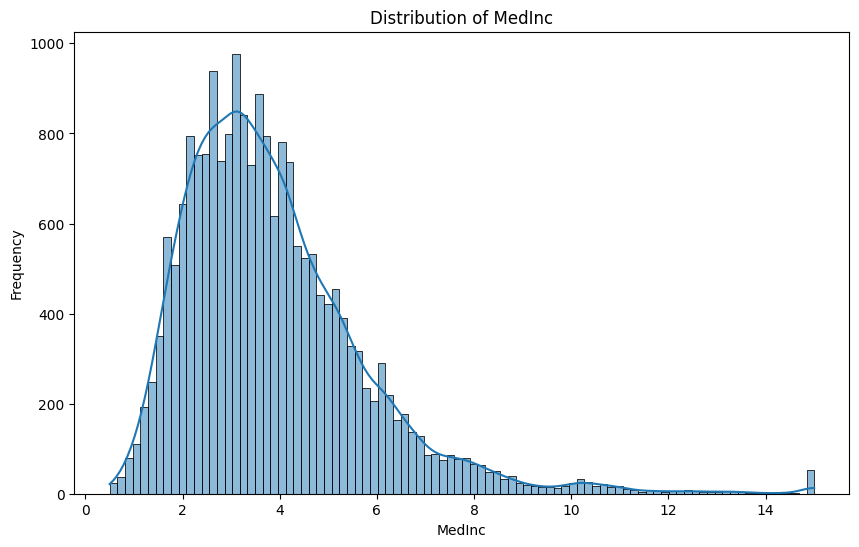

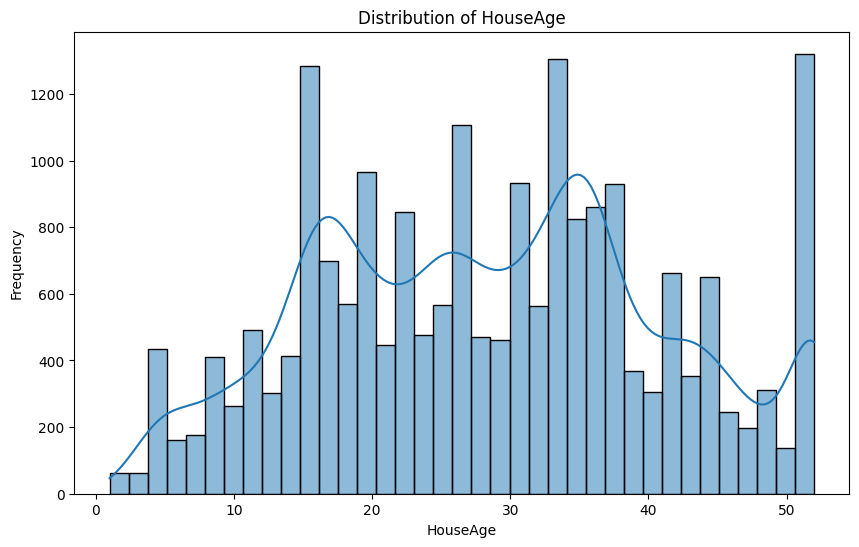

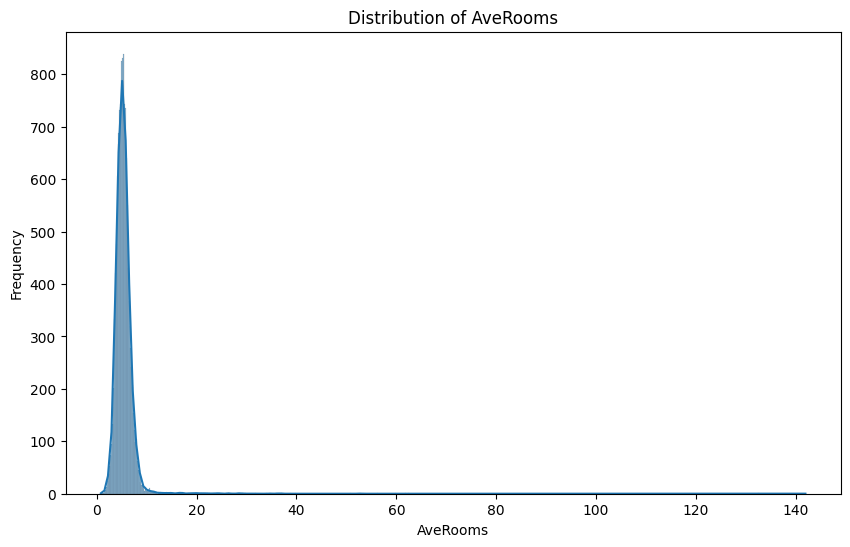

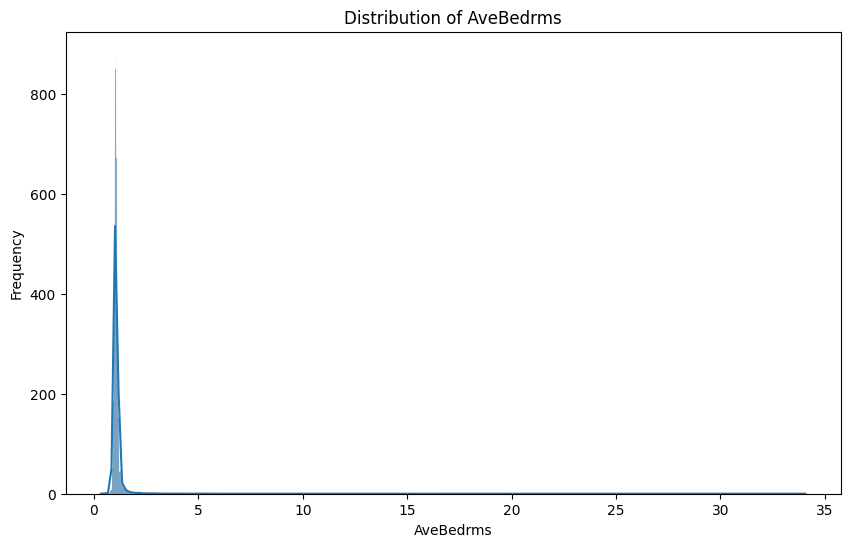

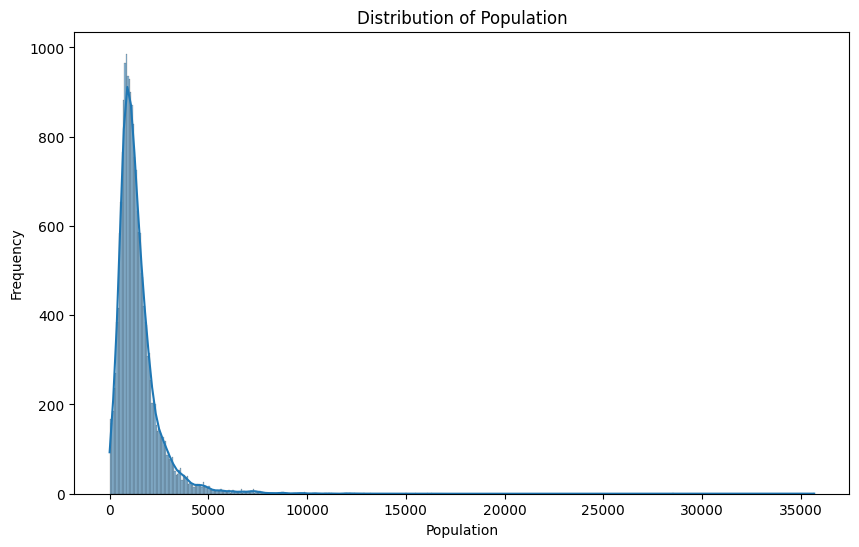

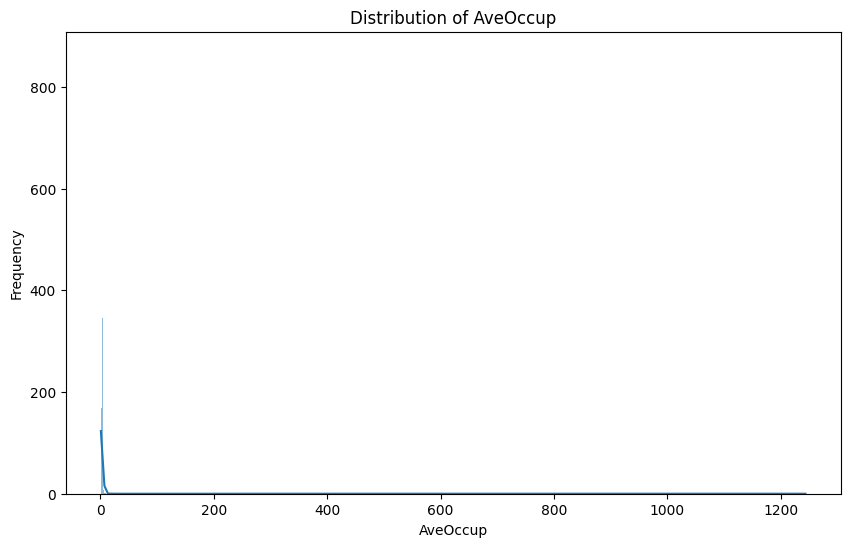

In [13]:
for X in cols :
    plt.figure(figsize=(10, 6))
    sns.histplot(calif_df[X], kde=True)
    plt.title(f'Distribution of {X}')
    plt.xlabel(X)
    plt.ylabel('Frequency')
    plt.show()

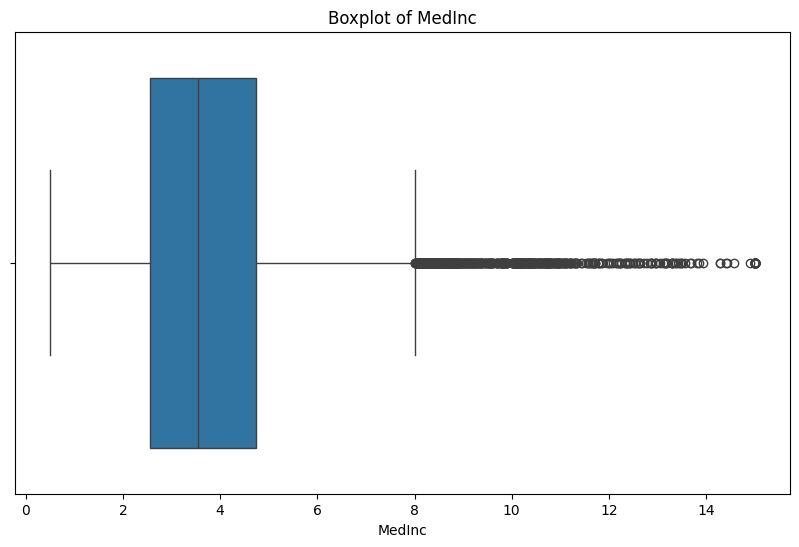

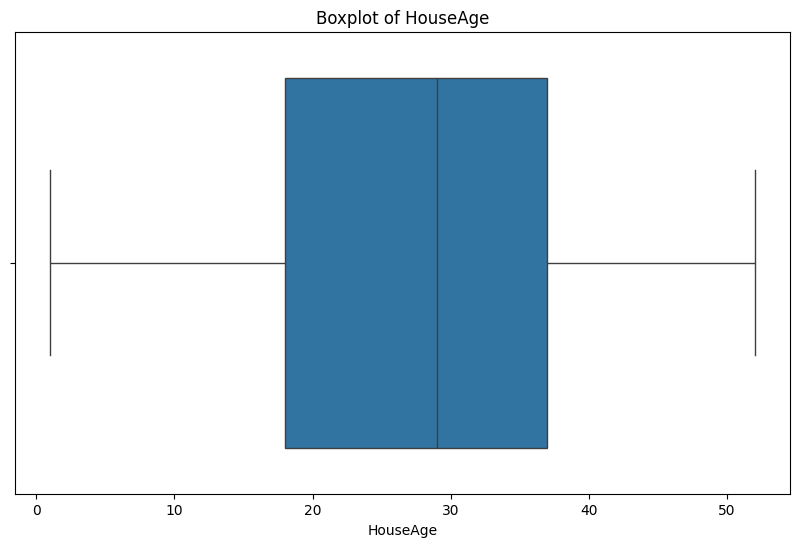

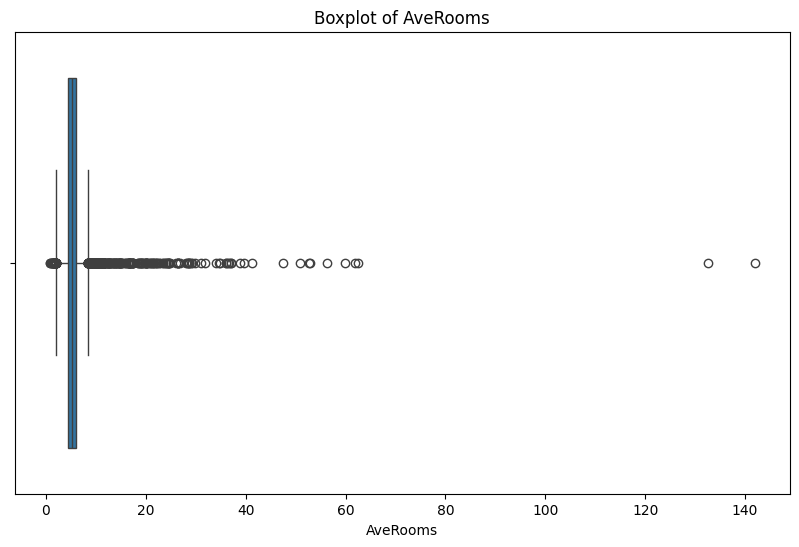

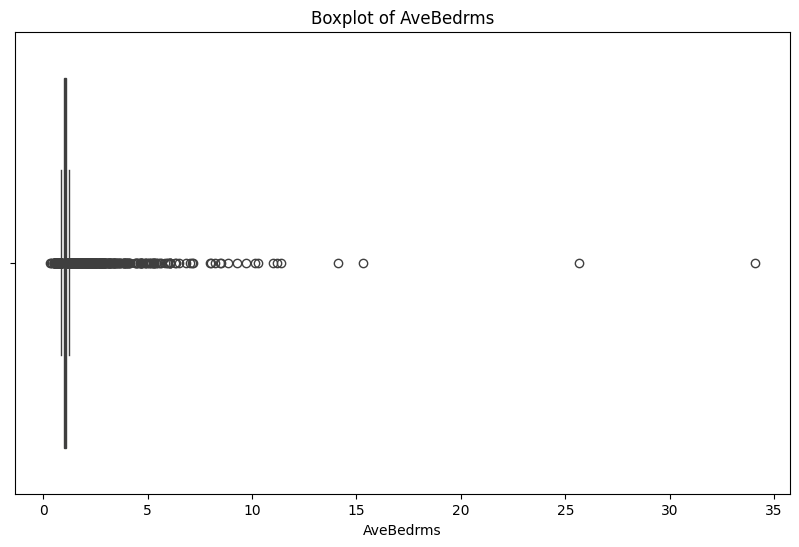

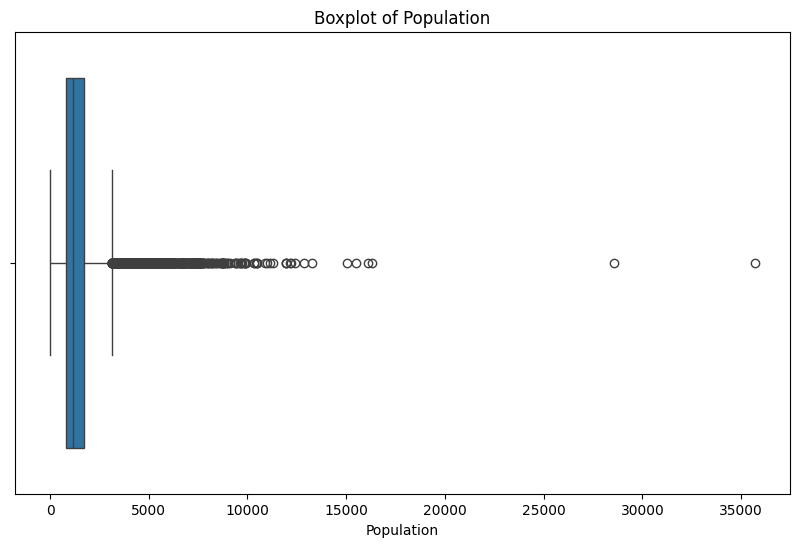

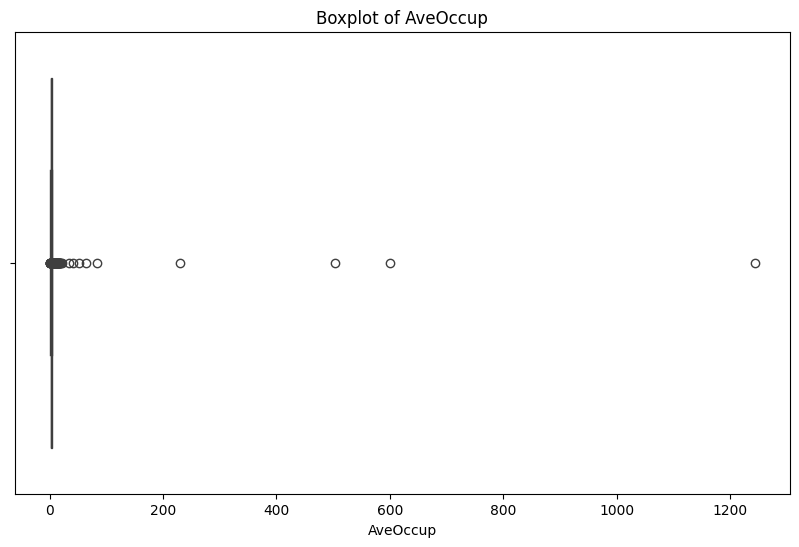

In [14]:
for x in cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=calif_df[x])
    plt.title(f'Boxplot of {x}')
    plt.xlabel(x)
    plt.show()

we can not consider avgBedrooms and Avgrooms have outliers by  considering some conditions for big houses

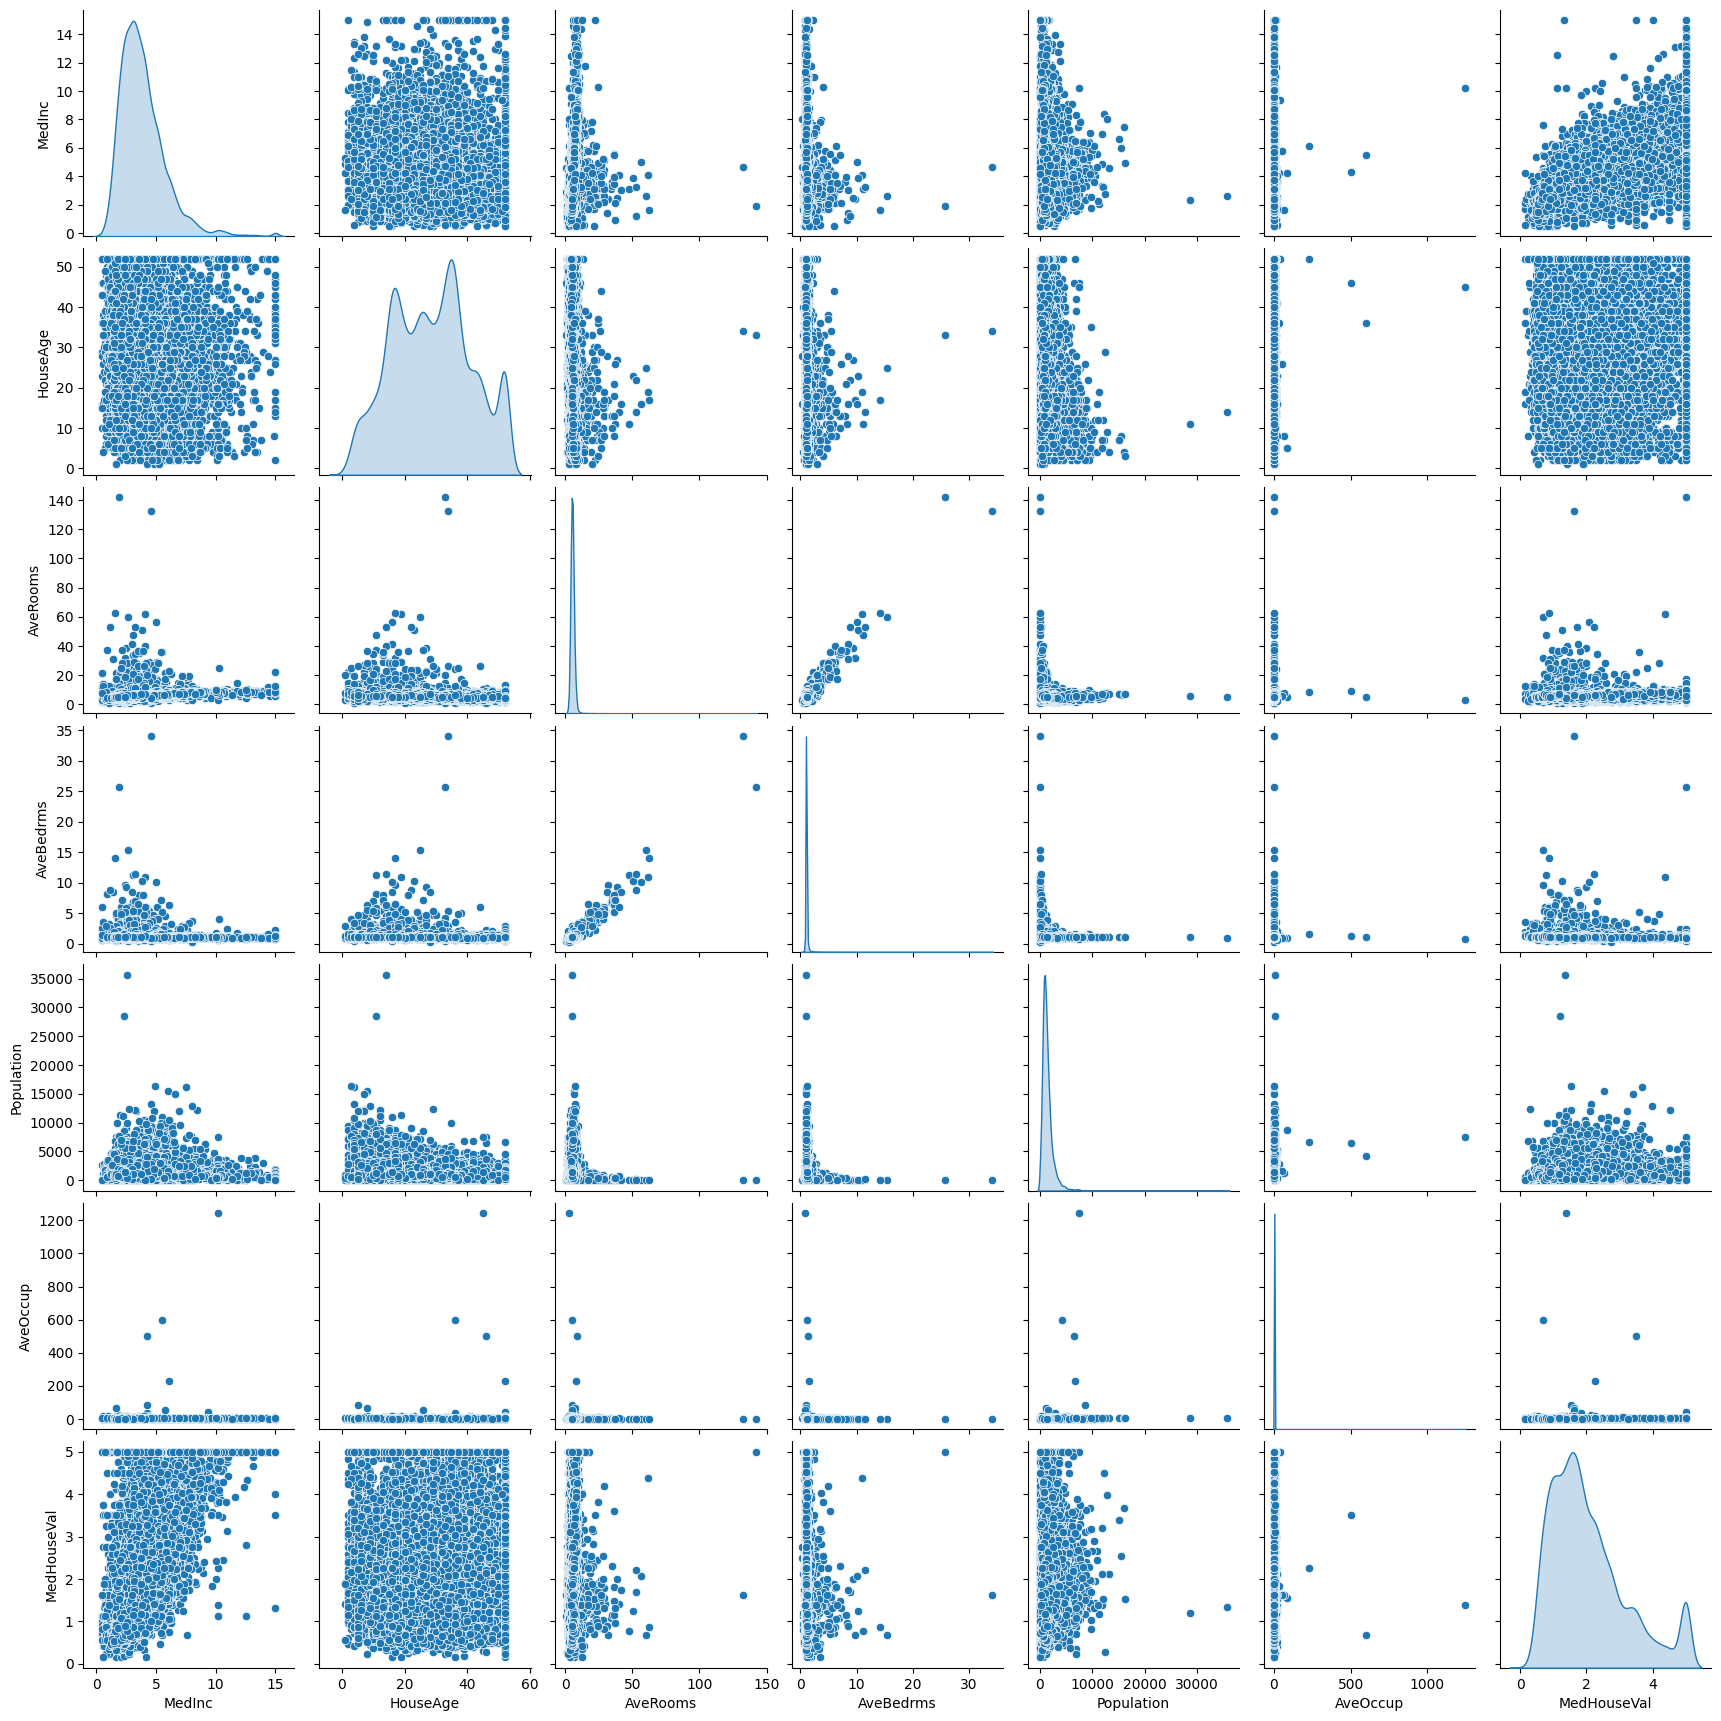

In [15]:
sns.pairplot(calif_df[cols + ['MedHouseVal']], diag_kind='kde', 
             markers='o') 



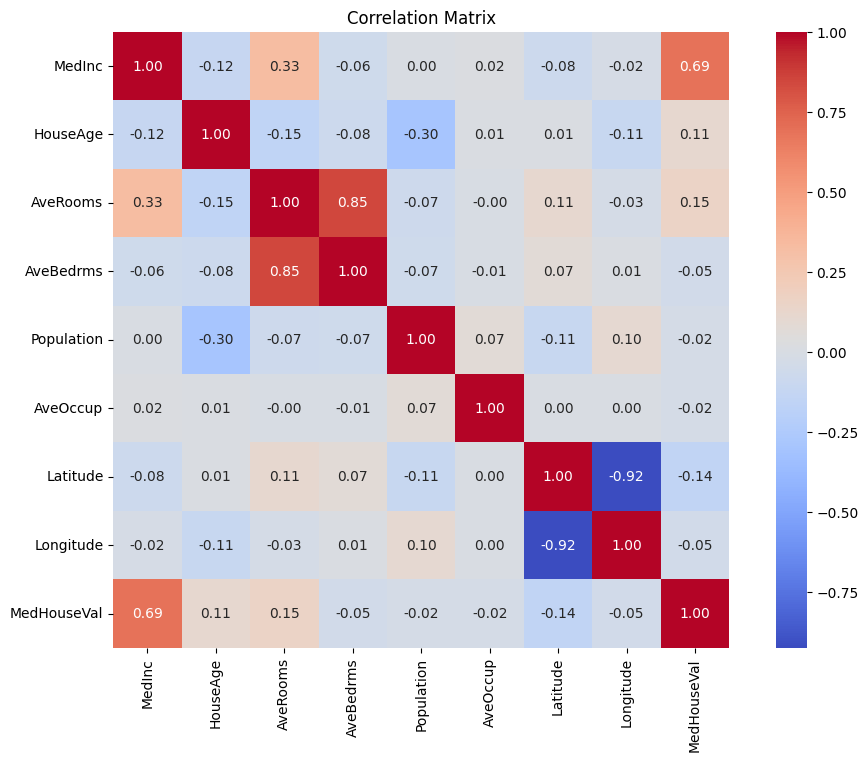

In [16]:
corr = calif_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()  


In [17]:
# apply partial correlation
from pingouin import partial_corr

partial_corr_df_MedInc = partial_corr(data = calif_df , x = 'MedInc', y = 'MedHouseVal', covar = ['HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'])
print(partial_corr_df_MedInc)
partial_corr_df_HouseAge = partial_corr(data = calif_df , x = 'HouseAge', y = 'MedHouseVal', covar = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup'])
print(partial_corr_df_HouseAge)
partial_corr_df_AveRooms = partial_corr(data = calif_df , x = 'AveRooms', y = 'MedHouseVal', covar = ['MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup'])
print(partial_corr_df_AveRooms)
partial_corr_df_AveBedrms = partial_corr(data = calif_df , x = 'AveBedrms', y = 'MedHouseVal', covar = ['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup'])
print(partial_corr_df_AveBedrms)
partial_corr_df_Population = partial_corr(data = calif_df , x = 'Population', y = 'MedHouseVal', covar = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'])
print(partial_corr_df_Population)

             n        r         CI95%  p-val
pearson  20640  0.67154  [0.66, 0.68]    0.0
             n         r         CI95%          p-val
pearson  20640  0.240376  [0.23, 0.25]  5.058130e-269
             n         r           CI95%          p-val
pearson  20640 -0.238246  [-0.25, -0.23]  3.566790e-264
             n         r         CI95%          p-val
pearson  20640  0.228211  [0.22, 0.24]  5.625709e-242
             n         r         CI95%     p-val
pearson  20640  0.030181  [0.02, 0.04]  0.000014


In [18]:
#  mutual information
from sklearn.feature_selection import mutual_info_regression

X = calif_df[cols]
y = calif_df['MedHouseVal']
mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)    

      Feature  Mutual Information
0      MedInc            0.387299
2    AveRooms            0.103174
5    AveOccup            0.073452
1    HouseAge            0.034226
3   AveBedrms            0.023520
4  Population            0.021584


Text(0.5, 1.0, 'California Housing Prices by Location')

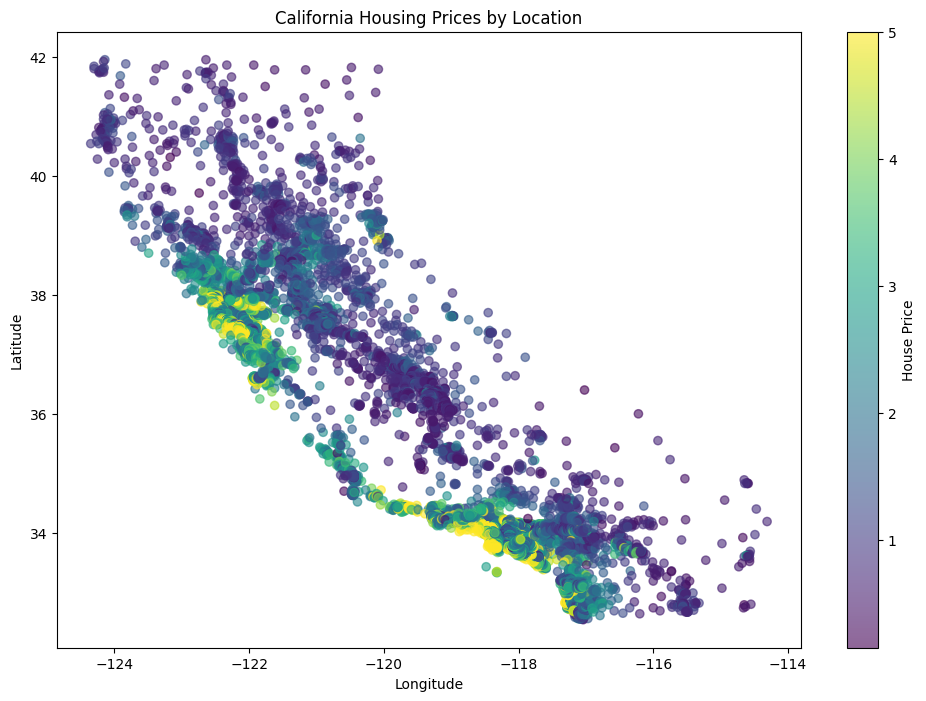

In [19]:

# إنشاء خريطة للمناطق
plt.figure(figsize=(12, 8))
scatter = plt.scatter(calif_df['Longitude'], calif_df['Latitude'], 
                     c=calif_df['MedHouseVal'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='House Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices by Location')

In [20]:
from sklearn.cluster  import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
calif_df["geographic_cluster"] = kmeans.fit_predict(calif_df[['Longitude', 'Latitude']])

for cluster in range(5):
    cluster_data = calif_df[calif_df["geographic_cluster"] == cluster]
    print(f"Cluster {cluster} - Number of samples: {len(cluster_data)}")
    

Cluster 0 - Number of samples: 11027
Cluster 1 - Number of samples: 4829
Cluster 2 - Number of samples: 1771
Cluster 3 - Number of samples: 688
Cluster 4 - Number of samples: 2325


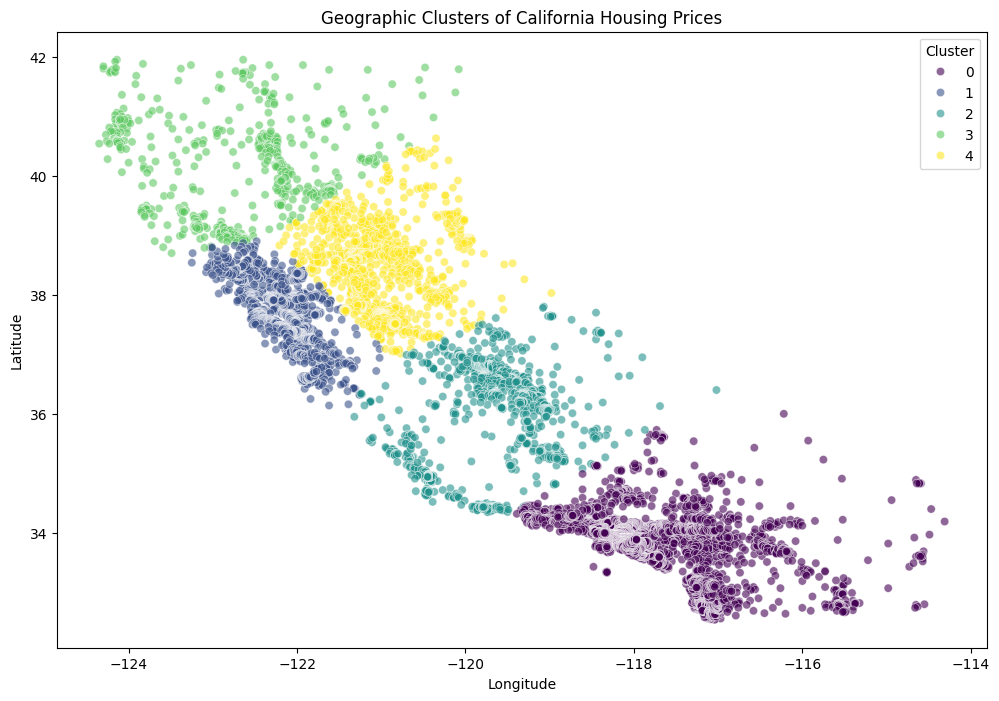

In [21]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=calif_df, x='Longitude', y='Latitude',
                hue='geographic_cluster', palette='viridis', alpha=0.6)
plt.title('Geographic Clusters of California Housing Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

In [22]:
import plotly.express as px

# 3D scatter plot
fig = px.scatter_3d(calif_df.sample(5000), x='Longitude', y='Latitude', z='MedHouseVal',
                    color='MedInc', size='AveRooms',
                    title='3D Housing Analysis')
fig.show()

In [23]:
features= calif_df.columns[:-1]  # Exclude target column
features

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler
x = calif_df[features].drop(columns=["MedHouseVal"])
y = calif_df['MedHouseVal']


In [25]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [26]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)


In [28]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

lr_model.fit(x_train, y_train)


LinearRegression()

In [29]:
y_lr_pred =lr_model.predict(x_test)

In [30]:
from  sklearn.metrics import mean_squared_error, r2_score 
mse_lr = mean_squared_error(y_test, y_lr_pred)
r2_lr= r2_score(y_test, y_lr_pred)    
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared: {r2_lr}")

Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508


In [31]:
#cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lr_model, x_scaled, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -np.mean(cv_scores)
print(f"Mean Cross-Validation Score (MSE): {mean_cv_score}")

Mean Cross-Validation Score (MSE): 0.5582901717686554


In [32]:
# 1. تأكد من أشكال البيانات
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
# print(f"Are they different? {not x_train.equals(x_test)}")

# 2. تأكد من الـ predictions
print(f"y_test mean: {y_test.mean():.2f}")
print(f"y_pred mean: {y_lr_pred.mean():.2f}")
print(f"First 5 actual: {y_test.iloc[:5].values}")
print(f"First 5 predicted: {y_lr_pred[:5]}")

# 3. شوف الفرق
diff = abs(y_test - y_lr_pred)
print(f"Max difference: {diff.max()}")
print(f"Mean difference: {diff.mean()}")

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_test mean: 2.06
y_pred mean: 2.05
First 5 actual: [0.477   0.458   5.00001 2.186   2.78   ]
First 5 predicted: [0.71912284 1.76401657 2.70965883 2.83892593 2.60465725]
Max difference: 9.875331025900977
Mean difference: 0.5332001304956565


In [33]:
# try SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd_model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(x_train, y_train)
y_sgd_pred = sgd_model.predict(x_test)
mse_sgd= mean_squared_error(y_test, y_sgd_pred)    
r2_sgd = r2_score(y_test, y_sgd_pred)    
print(f"Mean Squared Error: {mse_sgd}")
print(f"R-squared: {r2_sgd}")

Mean Squared Error: 26659.35440666511
R-squared: -20343.30078650161


In [34]:
# 1. تأكد من أشكال البيانات
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
# print(f"Are they different? {not x_train.equals(x_test)}")

# 2. تأكد من الـ predictions
print(f"y_test mean: {y_test.mean():.2f}")
print(f"y_pred mean: {y_sgd_pred.mean():.2f}")
print(f"First 5 actual: {y_test.iloc[:5].values}")
print(f"First 5 predicted: {y_sgd_pred[:5]}")

# 3. شوف الفرق
diff = abs(y_test - y_sgd_pred)
print(f"Max difference: {diff.max()}")
print(f"Mean difference: {diff.mean()}")

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_test mean: 2.06
y_pred mean: 8.94
First 5 actual: [0.477   0.458   5.00001 2.186   2.78   ]
First 5 predicted: [-109.60281311   58.29561523  137.02292167  -11.10775583  102.59638821]
Max difference: 6912.668628468629
Mean difference: 66.61848096081988


In [35]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train, y_train)
y_dt_pred = dt_model.predict(x_test)
mse_ds = mean_squared_error(y_test, y_dt_pred)
r2_ds = r2_score(y_test, y_dt_pred)    
print(f"Decision Tree - Mean Squared Error: {mse_ds}")
print(f"Decision Tree - R-squared: {r2_ds}")   

Decision Tree - Mean Squared Error: 0.4942716777366763
Decision Tree - R-squared: 0.6228111330554302


In [36]:
# 1. تأكد من أشكال البيانات
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
# print(f"Are they different? {not x_train.equals(x_test)}")

# 2. تأكد من الـ predictions
print(f"y_test mean: {y_test.mean():.2f}")
print(f"y_pred mean: {y_dt_pred.mean():.2f}")
print(f"First 5 actual: {y_test.iloc[:5].values}")
print(f"First 5 predicted: {y_dt_pred[:5]}")

# 3. شوف الفرق
diff = abs(y_test - y_dt_pred)
print(f"Max difference: {diff.max()}")
print(f"Mean difference: {diff.mean()}")

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_test mean: 2.06
y_pred mean: 2.08
First 5 actual: [0.477   0.458   5.00001 2.186   2.78   ]
First 5 predicted: [0.414   1.203   5.00001 2.17    2.257  ]
Max difference: 4.100009999999999
Mean difference: 0.4537843265503876


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)
y_rf_pred = rf_model.predict(x_test)
mse_rf = mean_squared_error(y_test, y_rf_pred)    
r2_rf = r2_score(y_test, y_rf_pred)    
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Random Forest - Mean Squared Error: 0.25549776668540763
Random Forest - R-squared: 0.805024407701793


In [38]:
# 1. تأكد من أشكال البيانات
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
# print(f"Are they different? {not x_train.equals(x_test)}")

# 2. تأكد من الـ predictions
print(f"y_test mean: {y_test.mean():.2f}")
print(f"y_pred mean: {y_rf_pred.mean():.2f}")
print(f"First 5 actual: {y_test.iloc[:5].values}")
print(f"First 5 predicted: {y_rf_pred[:5]}")

# 3. شوف الفرق
diff = abs(y_test - y_rf_pred)
print(f"Max difference: {diff.max()}")
print(f"Mean difference: {diff.mean()}")

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_test mean: 2.06
y_pred mean: 2.07
First 5 actual: [0.477   0.458   5.00001 2.186   2.78   ]
First 5 predicted: [0.5095    0.74161   4.9232571 2.52961   2.27369  ]
Max difference: 3.0434997999999993
Mean difference: 0.32761306601259704


In [39]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(x_train, y_train)
y_gb_pred = gb_model.predict(x_test)
mse_gd = mean_squared_error(y_test, y_gb_pred)
r2_gd = r2_score(y_test, y_gb_pred)    
print(f"Gradient Boosting - Mean Squared Error: {mse_gd}")
print(f"Gradient Boosting - R-squared: {r2_gd}")

Gradient Boosting - Mean Squared Error: 0.29399901242474274
Gradient Boosting - R-squared: 0.7756433164710084


In [40]:
# 1. تأكد من أشكال البيانات
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
# print(f"Are they different? {not x_train.equals(x_test)}")

# 2. تأكد من الـ predictions
print(f"y_test mean: {y_test.mean():.2f}")
print(f"y_pred mean: {y_gb_pred.mean():.2f}")
print(f"First 5 actual: {y_test.iloc[:5].values}")
print(f"First 5 predicted: {y_gb_pred[:5]}")

# 3. شوف الفرق
diff = abs(y_test - y_gb_pred)
print(f"Max difference: {diff.max()}")
print(f"Mean difference: {diff.mean()}")

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_test mean: 2.06
y_pred mean: 2.06
First 5 actual: [0.477   0.458   5.00001 2.186   2.78   ]
First 5 predicted: [0.50518761 1.09334601 4.24570956 2.54517359 2.27910301]
Max difference: 4.011417990282378
Mean difference: 0.37165044848436773


In [41]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train, y_train) 
y_svr_pred = svr_model.predict(x_test)
mse_svr = mean_squared_error(y_test, y_svr_pred)
r2_svr = r2_score(y_test, y_svr_pred)
print(f"Support Vector Regression - Mean Squared Error: {mse_svr}")
print(f"Support Vector Regression - R-squared: {r2_svr}")   

Support Vector Regression - Mean Squared Error: 0.3551984619989409
Support Vector Regression - R-squared: 0.728940759795647


In [42]:
# 1. تأكد من أشكال البيانات
print(f"X_train shape: {x_train.shape}")
print(f"X_test shape: {x_test.shape}")
# print(f"Are they different? {not x_train.equals(x_test)}")

# 2. تأكد من الـ predictions
print(f"y_test mean: {y_test.mean():.2f}")
print(f"y_pred mean: {y_svr_pred.mean():.2f}")
print(f"First 5 actual: {y_test.iloc[:5].values}")
print(f"First 5 predicted: {y_svr_pred[:5]}")

# 3. شوف الفرق
diff = abs(y_test - y_svr_pred)
print(f"Max difference: {diff.max()}")
print(f"Mean difference: {diff.mean()}")

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_test mean: 2.06
y_pred mean: 1.97
First 5 actual: [0.477   0.458   5.00001 2.186   2.78   ]
First 5 predicted: [0.52166189 1.56843583 3.58873947 2.48204847 2.58237506]
Max difference: 3.972694201560115
Mean difference: 0.3977630963437857


In [43]:
# code collected scores 
scores = {
    'Model': ['Linear Regression', 'SGD Regressor', 'Decision Tree', 
              'Random Forest', 'Gradient Boosting', 'SVR'],
    'MSE': [mse_lr, mse_sgd, mse_ds, mse_rf, mse_gd, mse_svr],
    'R-squared': [r2_lr, r2_sgd, r2_ds, r2_rf, r2_gd, r2_svr]
}

scores_df = pd.DataFrame(scores)

In [44]:
scores_df

,Model,MSE,R-squared
0,Linear Regression,0.555892,0.575788
1,SGD Regressor,26659.354407,-20343.300787
2,Decision Tree,0.494272,0.622811
3,Random Forest,0.255498,0.805024
4,Gradient Boosting,0.293999,0.775643
5,SVR,0.355198,0.728941


Random forest Model Looks Great !!

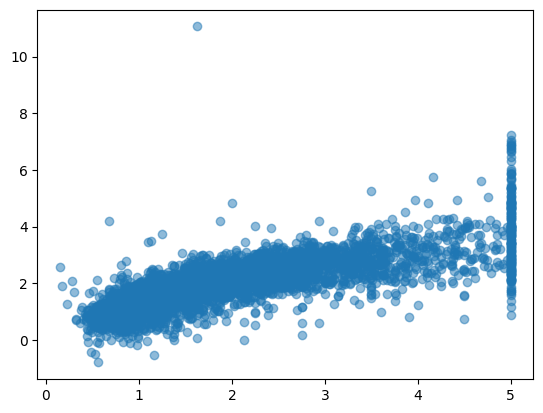

In [217]:
plt.scatter(y_test, y_lr_pred, alpha=0.5, label='Linear Regression')

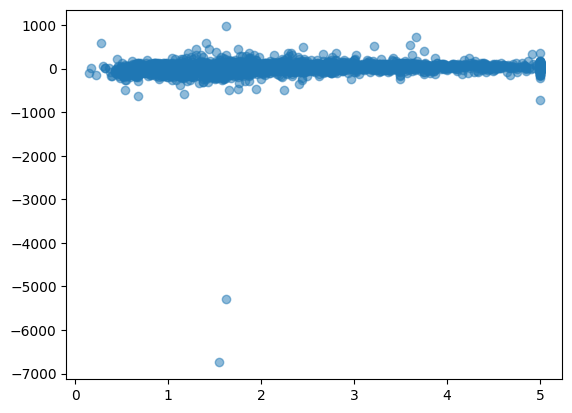

In [218]:
plt.scatter(y_test, y_sgd_pred, alpha=0.5, label='Stochastic Regression')

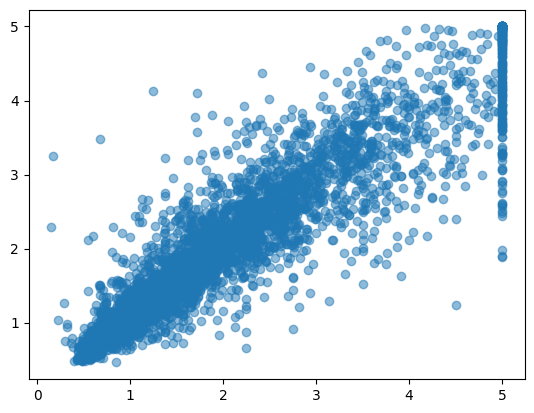

In [219]:
plt.scatter(y_test, y_rf_pred, alpha=0.5, label='Random Forest Regression')

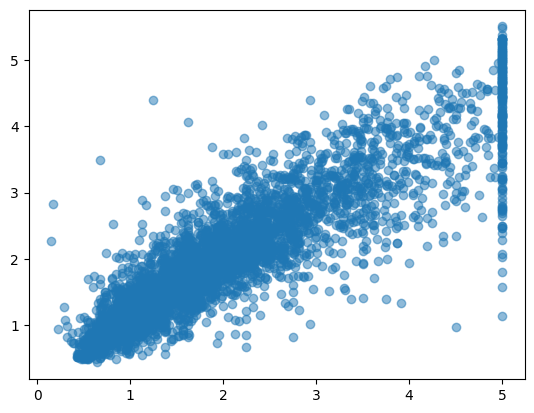

In [220]:
plt.scatter(y_test, y_gb_pred, alpha=0.5, label='gradient boosting Regression')

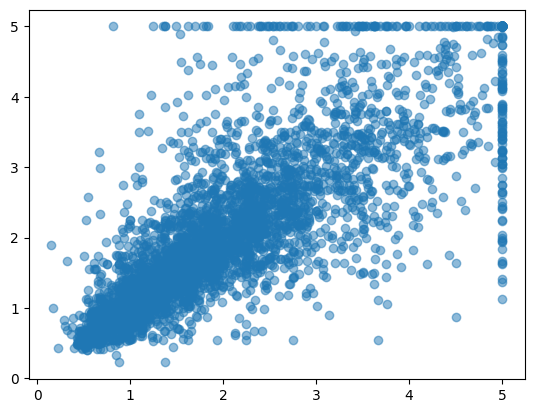

In [221]:
plt.scatter(y_test, y_dt_pred, alpha=0.5, label='Decision Tree Regression')

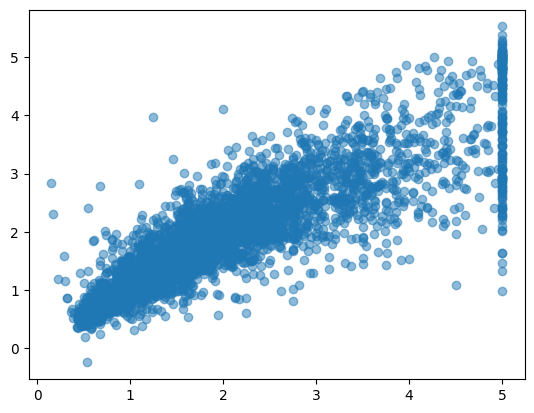

In [222]:
plt.scatter(y_test, y_svr_pred, alpha=0.5, label='support vector Regression')

## Pickling models for deployment

In [46]:
import pickle

save models 

In [225]:
pickle.dump(lr_model, open('linear_regression_model.pkl', 'wb'))
pickle.dump(sgd_model, open('sgd_regression_model.pkl', 'wb'))
pickle.dump(dt_model, open('decision_tree_model.pkl', 'wb'))
pickle.dump(rf_model, open('random_forest_model.pkl', 'wb'))
pickle.dump(gb_model, open('gradient_boosting_model.pkl', 'wb'))
pickle.dump(svr_model, open('svr_model.pkl', 'wb'))

pickle the scaler

In [47]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [49]:
calif_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,geographic_cluster
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1


load model

In [226]:
pickeld_rf_model = pickle.load(open('random_forest_model.pkl', 'rb'))

In [229]:
pickeld_rf_model.predict(x_test[0:5])

array([0.4839   , 0.68606  , 4.9115172, 2.60717  , 2.4980201])